In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math
# read the file into a list of lines and print to separate files for different outputs
link_to_files = "results/"
for d in [0,1,3,4,5,6]:
    for version in ["basic", "ensemble", "modelstore", "HAT", "LeverageBagging"]:
        with open(link_to_files+"results_"+version+"_"+str(d)+".txt",'r') as f:
            lines = f.read().split("\n")
        output_file_perf = open(link_to_files+version+"/Performance_Output_"+ str(d)+".txt", "w")
        output_file_retrainings = open(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt", "w")
        output_file_update = open(link_to_files+version+"/Update_Output_"+ str(d)+".txt", "w")
        word_perf = 'Test batch'
        word_drift = 'Change detected'
        word_nondrift = 'No drift but'
        word_update = 'Online model is updated'
        # iterate over lines, and print out line numbers which contain the word of interest.
        for j,line in enumerate(lines):
            if word_perf in line: # or word in line.split() to search for full word
                print("{}".format(line), file=output_file_perf)
            if word_drift in line:
                print("{}".format(line), file=output_file_retrainings)
            if word_update in line:
                print("{}".format(line), file=output_file_update)
            if word_nondrift in line:
                print("{}".format(line), file=output_file_retrainings)
        output_file_perf.close()
        output_file_retrainings.close()
        output_file_update.close()
#Read data from the output files
# Get test scores and batch numbers
results={}
retrainings={}
for d in [0, 1, 3, 4, 5, 6]:  # data streams
    results["AutOL_Data_" + str(d)]={}
    retrainings["AutOL_Data_" + str(d)] = {}
    for version in ["basic", "ensemble", "modelstore", "HAT", "LeverageBagging"]:
        #Get performance
        read_perf = pd.read_table(link_to_files+version+"/Performance_Output_"+ str(d)+".txt", header=None, sep=' ')
        results["AutOL_Data_" + str(d)][version] = (read_perf.iloc[:, [3, 6]])
        results["AutOL_Data_" + str(d)][version].columns = ['Batch number', 'Test score']
        results["AutOL_Data_" + str(d)][version]['Test score'] = results["AutOL_Data_" + str(d)][version]['Test score'].str.rstrip('%').astype('float') / 100.0
        #Get retraining points and types - No : no drift training point, Change: drift training point
        if os.path.getsize(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt") > 0:
            read_retraining = pd.read_table(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt", header=None, sep=' ')
            retrainings["AutOL_Data_" + str(d)][version] = read_retraining.iloc[:, [5,0]]
            retrainings["AutOL_Data_" + str(d)][version].columns = ['Batch number', 'Type']
        #Get model switch to ensemble/model store or AutOL output
        if version not in {"basic", "HAT", "LeverageBagging"} and os.path.getsize(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt") > 0:
            read_update = pd.read_table(link_to_files+version+"/Update_Output_"+ str(d)+".txt", header=None, sep=' ', names=list(range(8)))
            retrainings["AutOL_Data_" + str(d)][version]['Model update'] = read_update.iloc[:, [6]]
            if version == "modelstore":
                retrainings["AutOL_Data_" + str(d)][version]['Model update'] = retrainings["AutOL_Data_" + str(d)][version]['Model update'].shift(5)
                retrainings["AutOL_Data_" + str(d)][version]['Model update'].replace(np.nan, "AutoML", inplace=True)
                retrainings["AutOL_Data_" + str(d)][version].reset_index(drop=True, inplace=True)
                

retrainings

/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

{'AutOL_Data_0': {'basic':     Batch number    Type
  0           6075  Change
  1           7232  Change
  2           8522  Change
  3           9691  Change
  4          10780  Change
  5          11912  Change
  6          12981  Change
  7          14032  Change
  8          15232  Change
  9          16384  Change
  10         17384  Change
  11         20061  Change
  12         21165  Change
  13         22214  Change
  14         23423  Change
  15         24470  Change
  16         28443  Change
  17         29503  Change
  18         30739  Change
  19         31830  Change
  20         33048  Change
  21         34074  Change
  22         36408  Change
  23         37492  Change
  24         38634  Change
  25         40028  Change
  26         41307  Change
  27         42386  Change
  28         43675  Change
  29         44751  Change,
  'ensemble':     Batch number    Type Model update
  0           6087  Change    Ensemble.
  1           7189  Change    Ensemble.
  2  

In [4]:
def make_marker_array(a,e,choice):
    b= a[choice]
    c = list(b['Batch number'])
    r = []
    for j in c:
        i = math.ceil(j/1000)*1000
        r.append(i)
    both = set(r).intersection(e)
    e=list(e)
    markon = [e.index(x) for x in both]
    return markon

/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Matplotlib is currently using module

<Figure size 1800x1440 with 0 Axes>

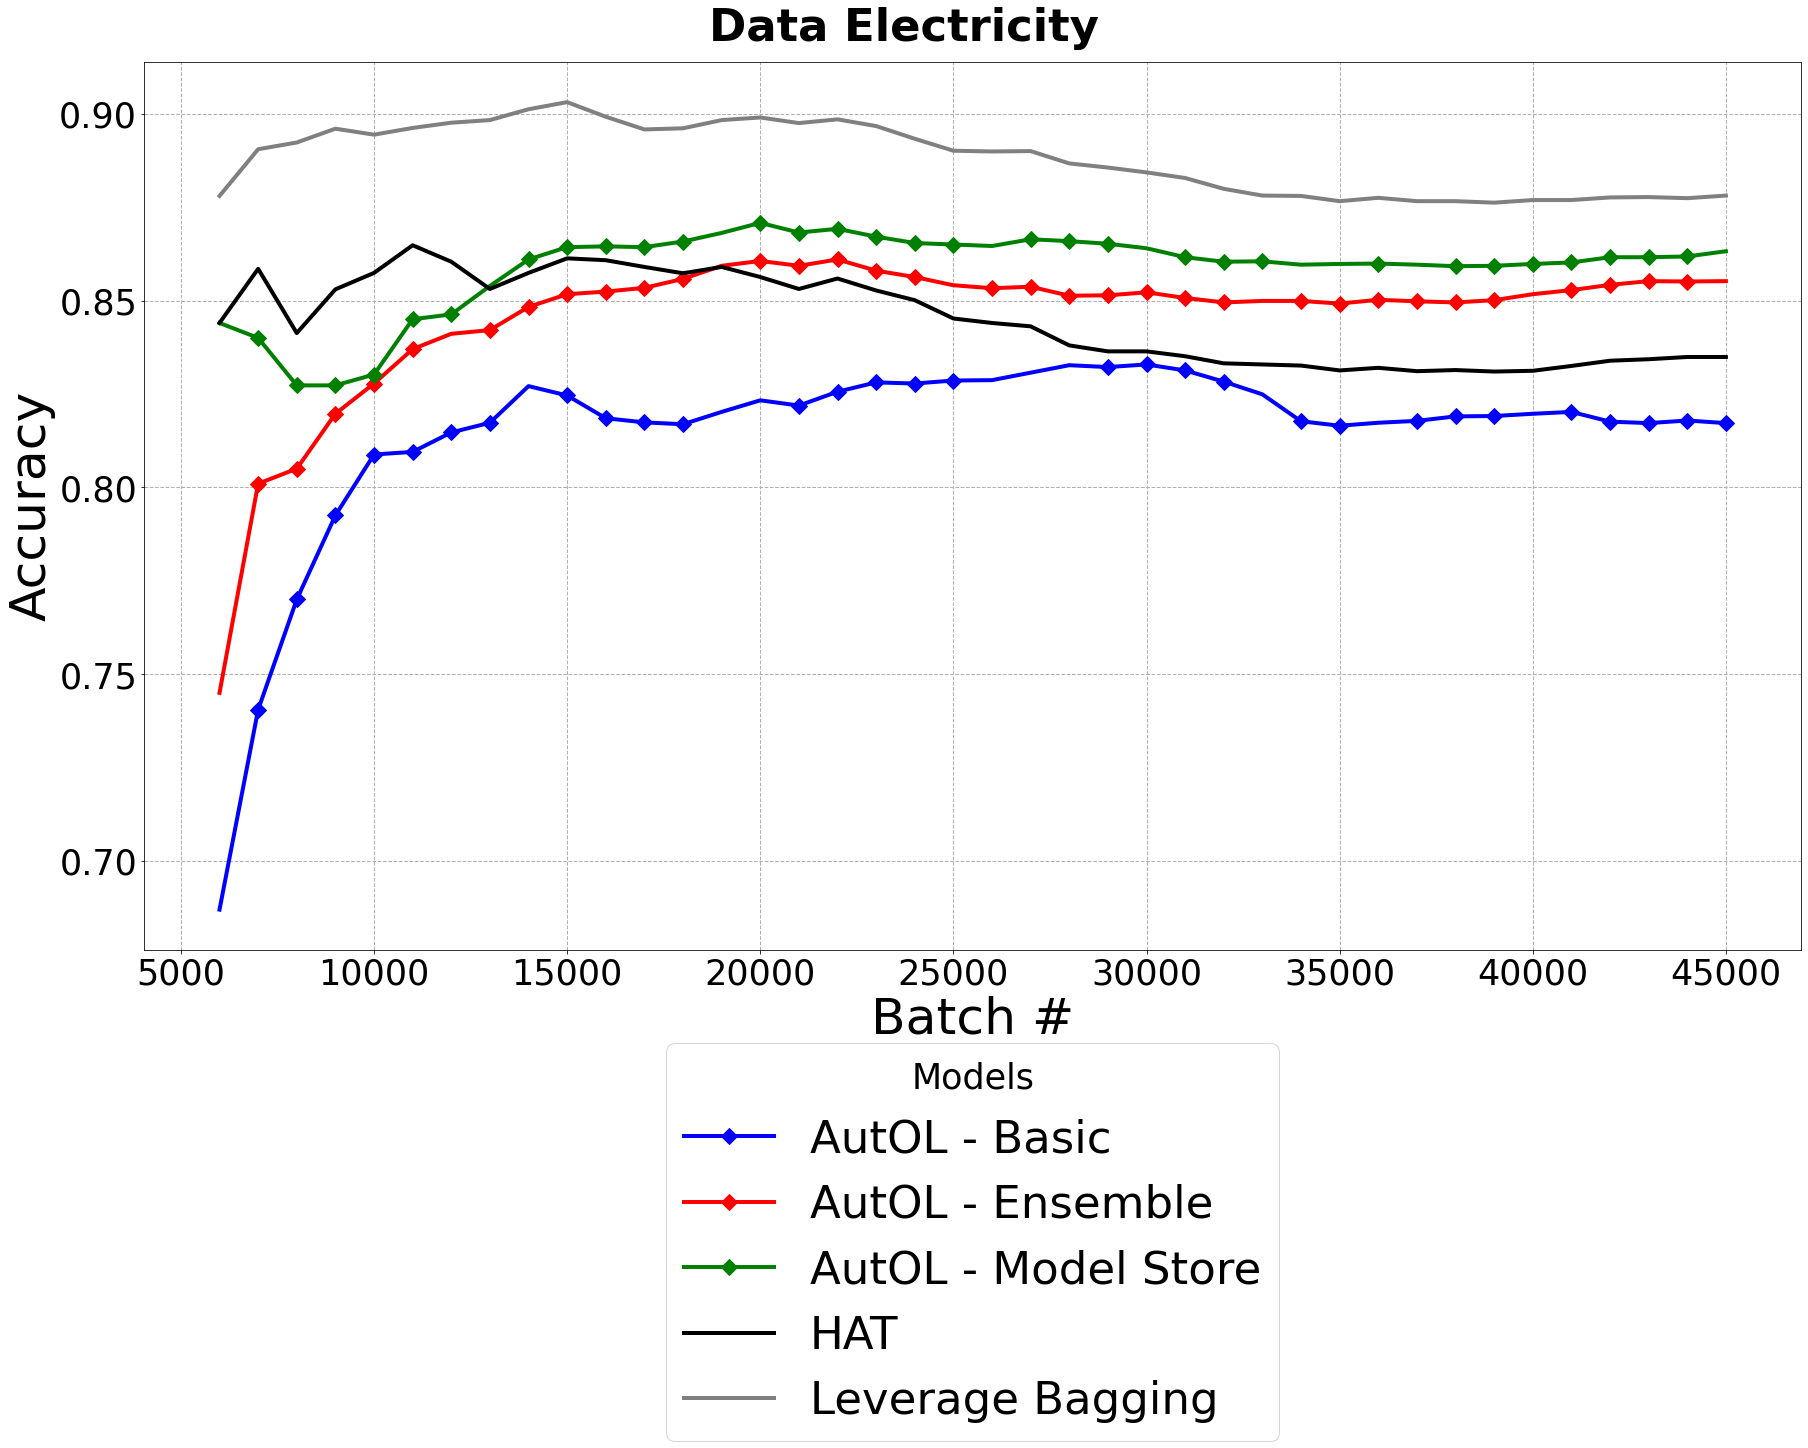

<Figure size 1800x1440 with 0 Axes>

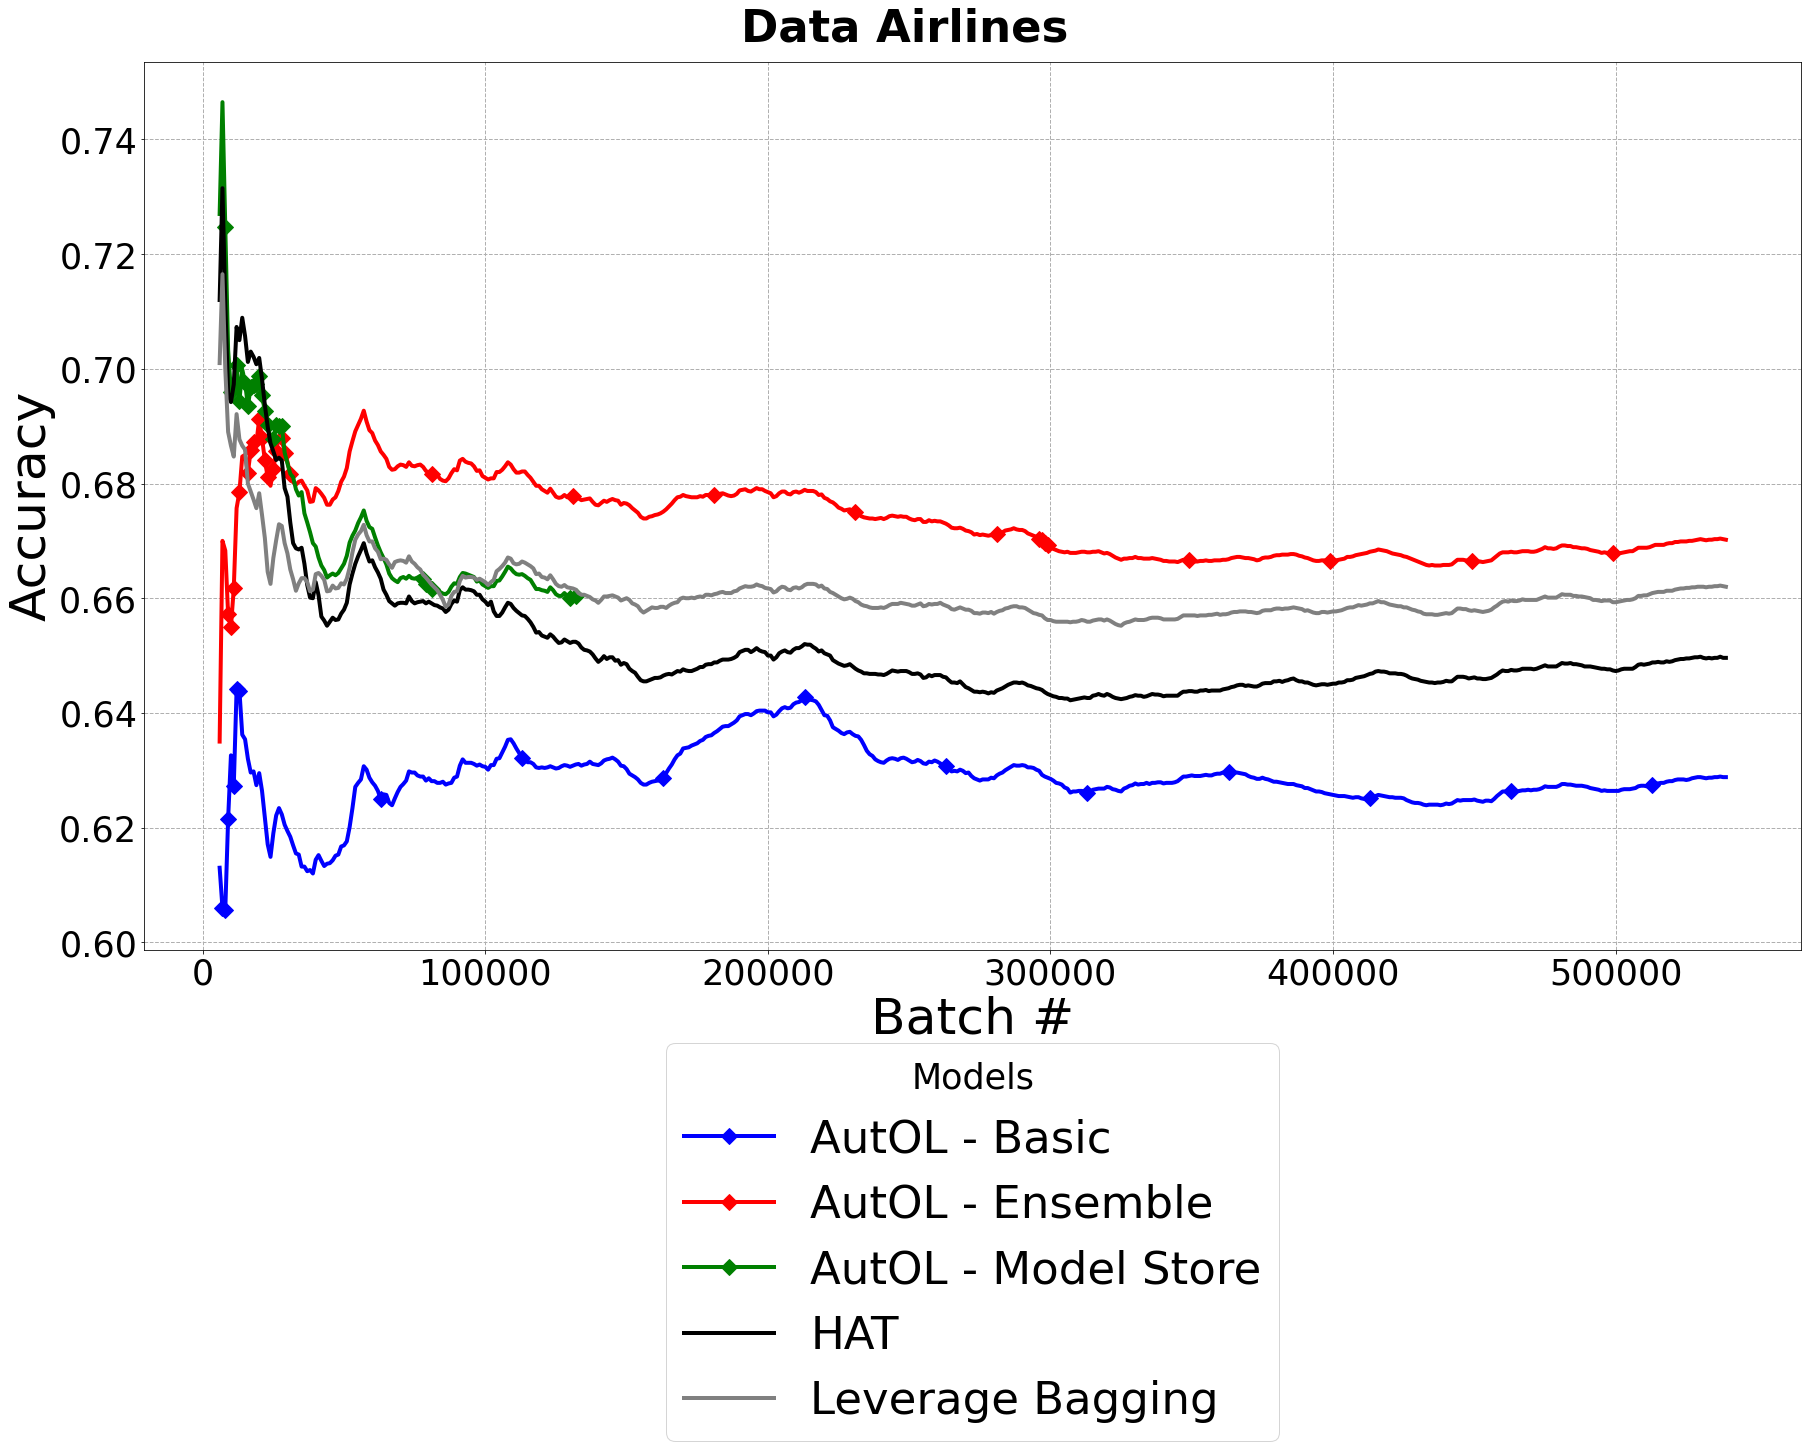

<Figure size 1800x1440 with 0 Axes>

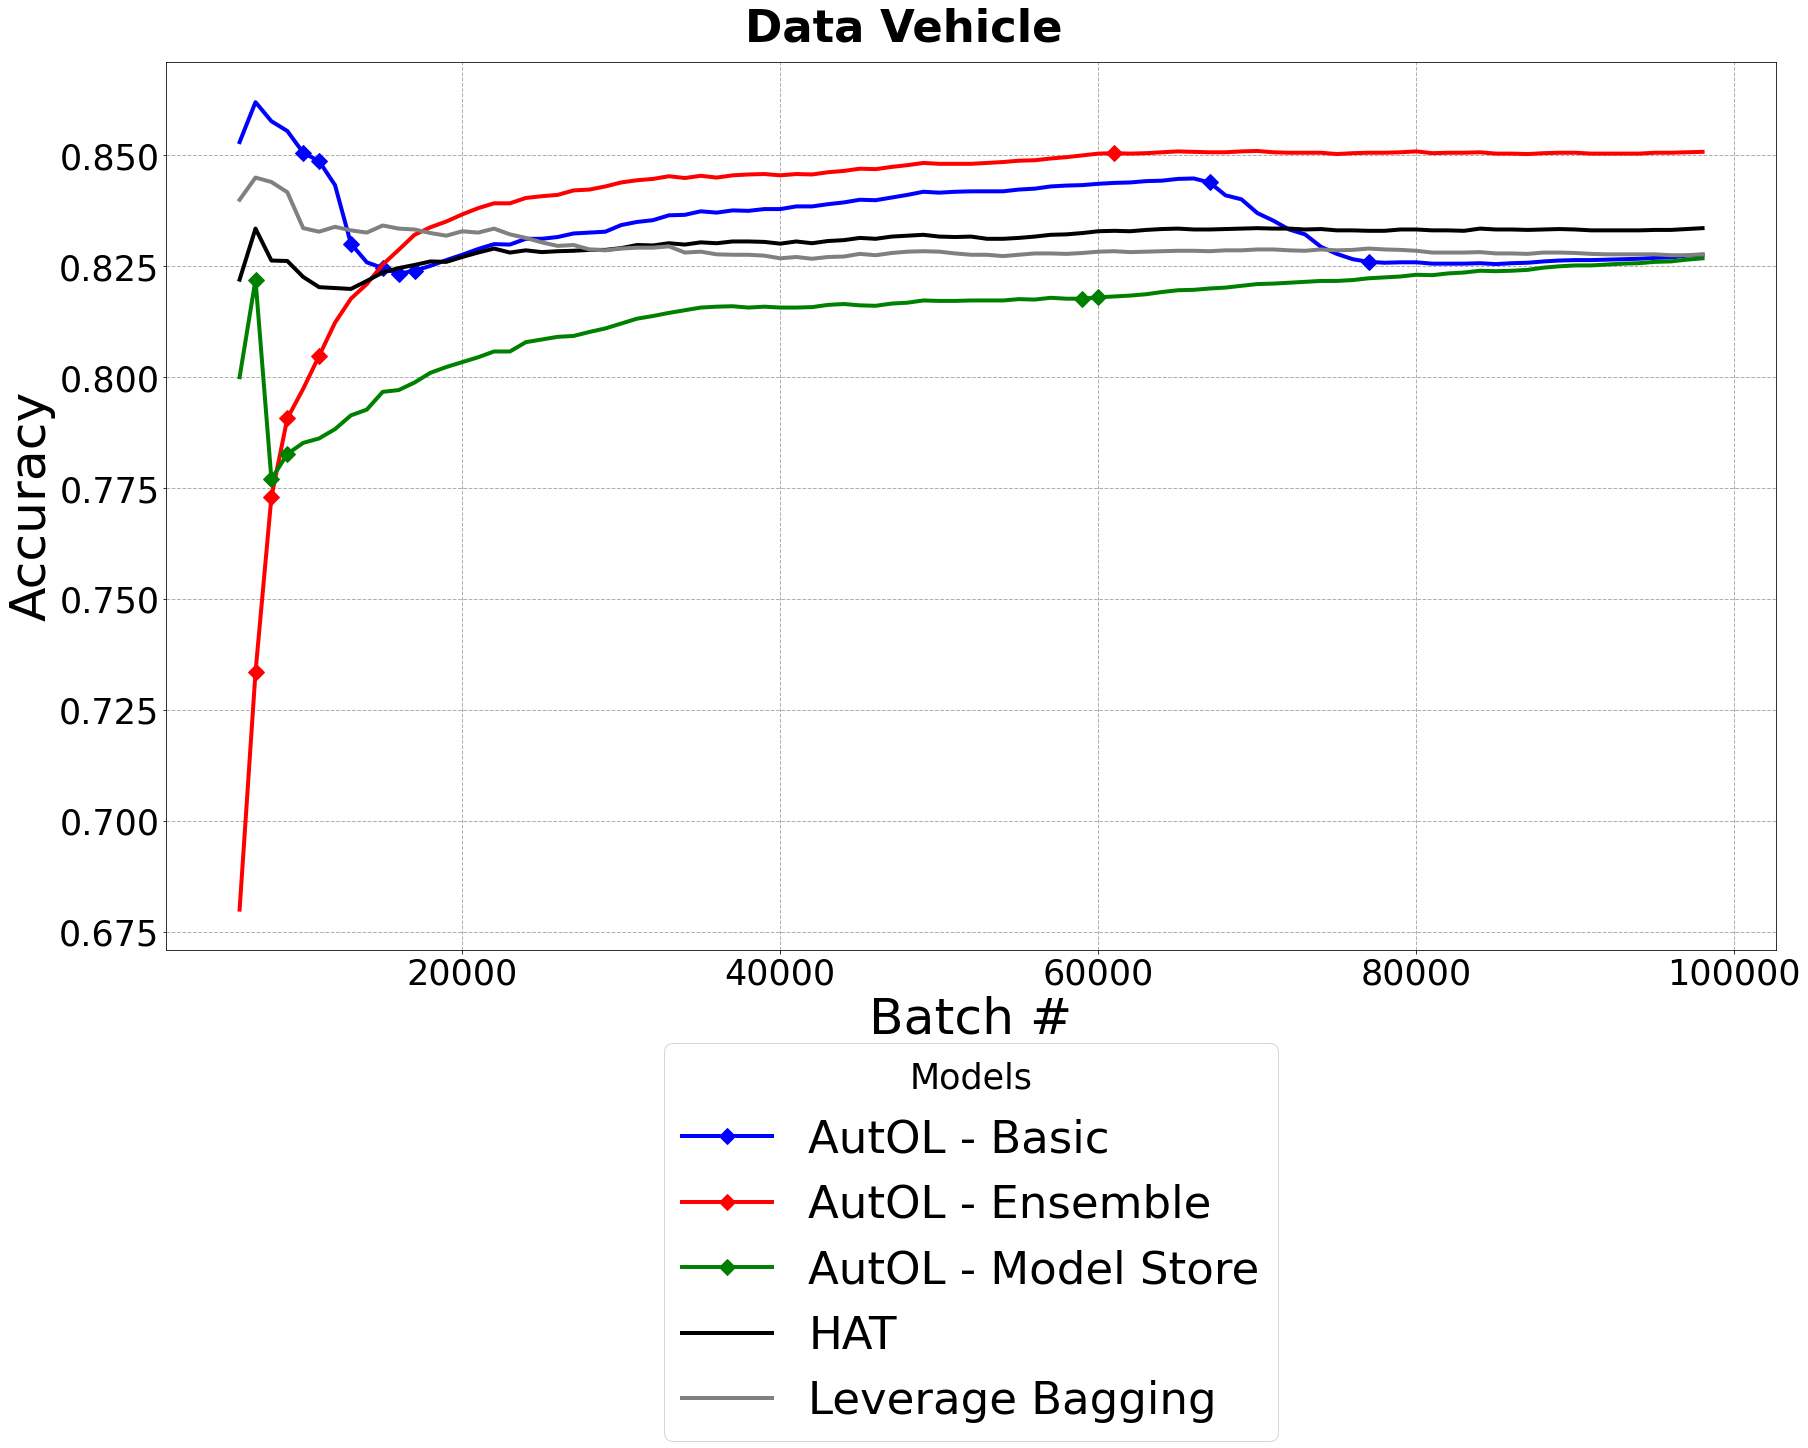

<Figure size 1800x1440 with 0 Axes>

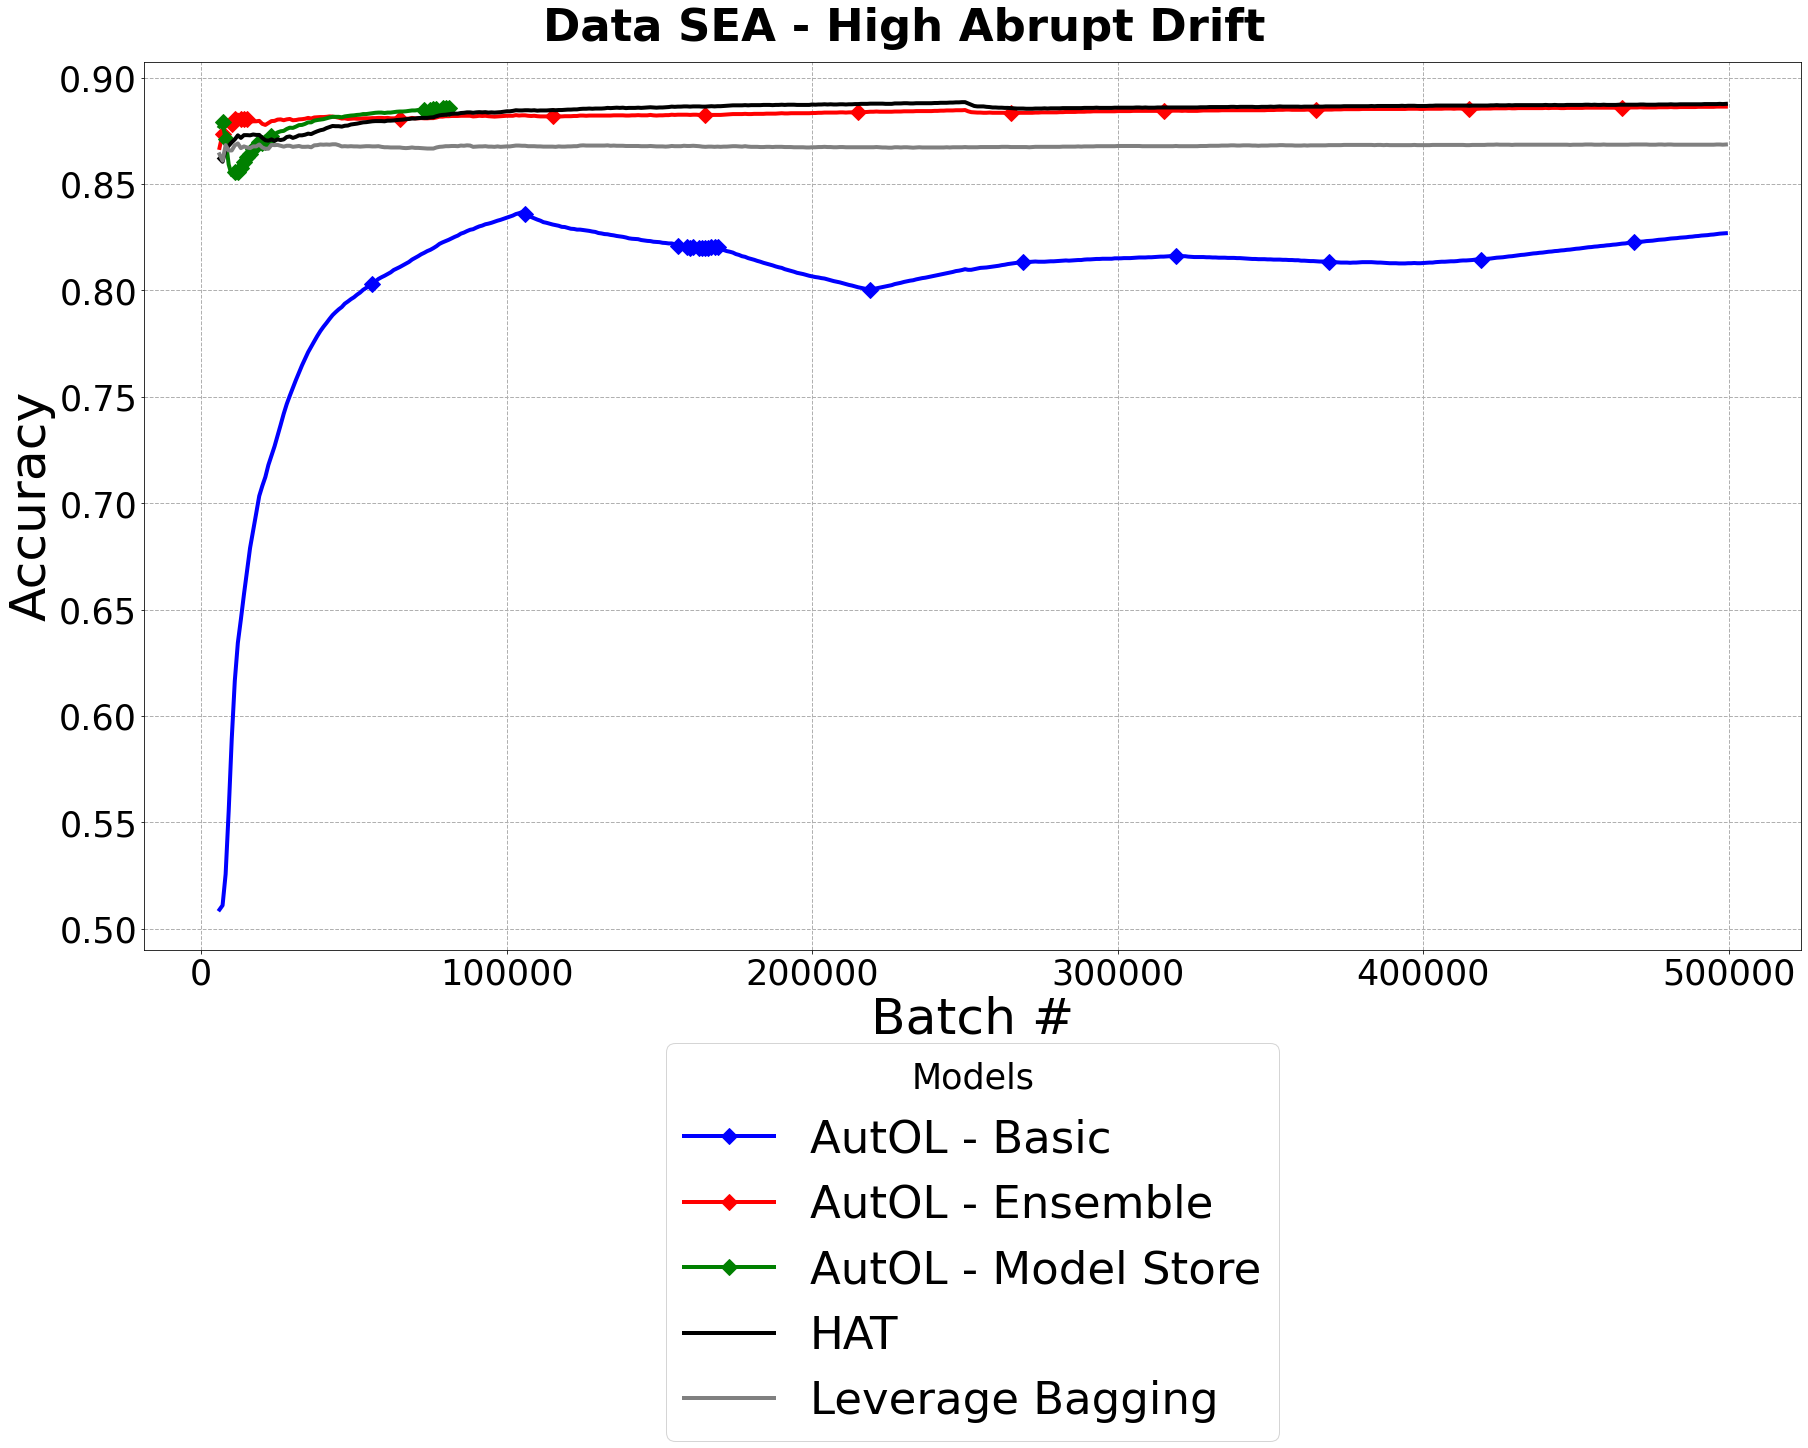

<Figure size 1800x1440 with 0 Axes>

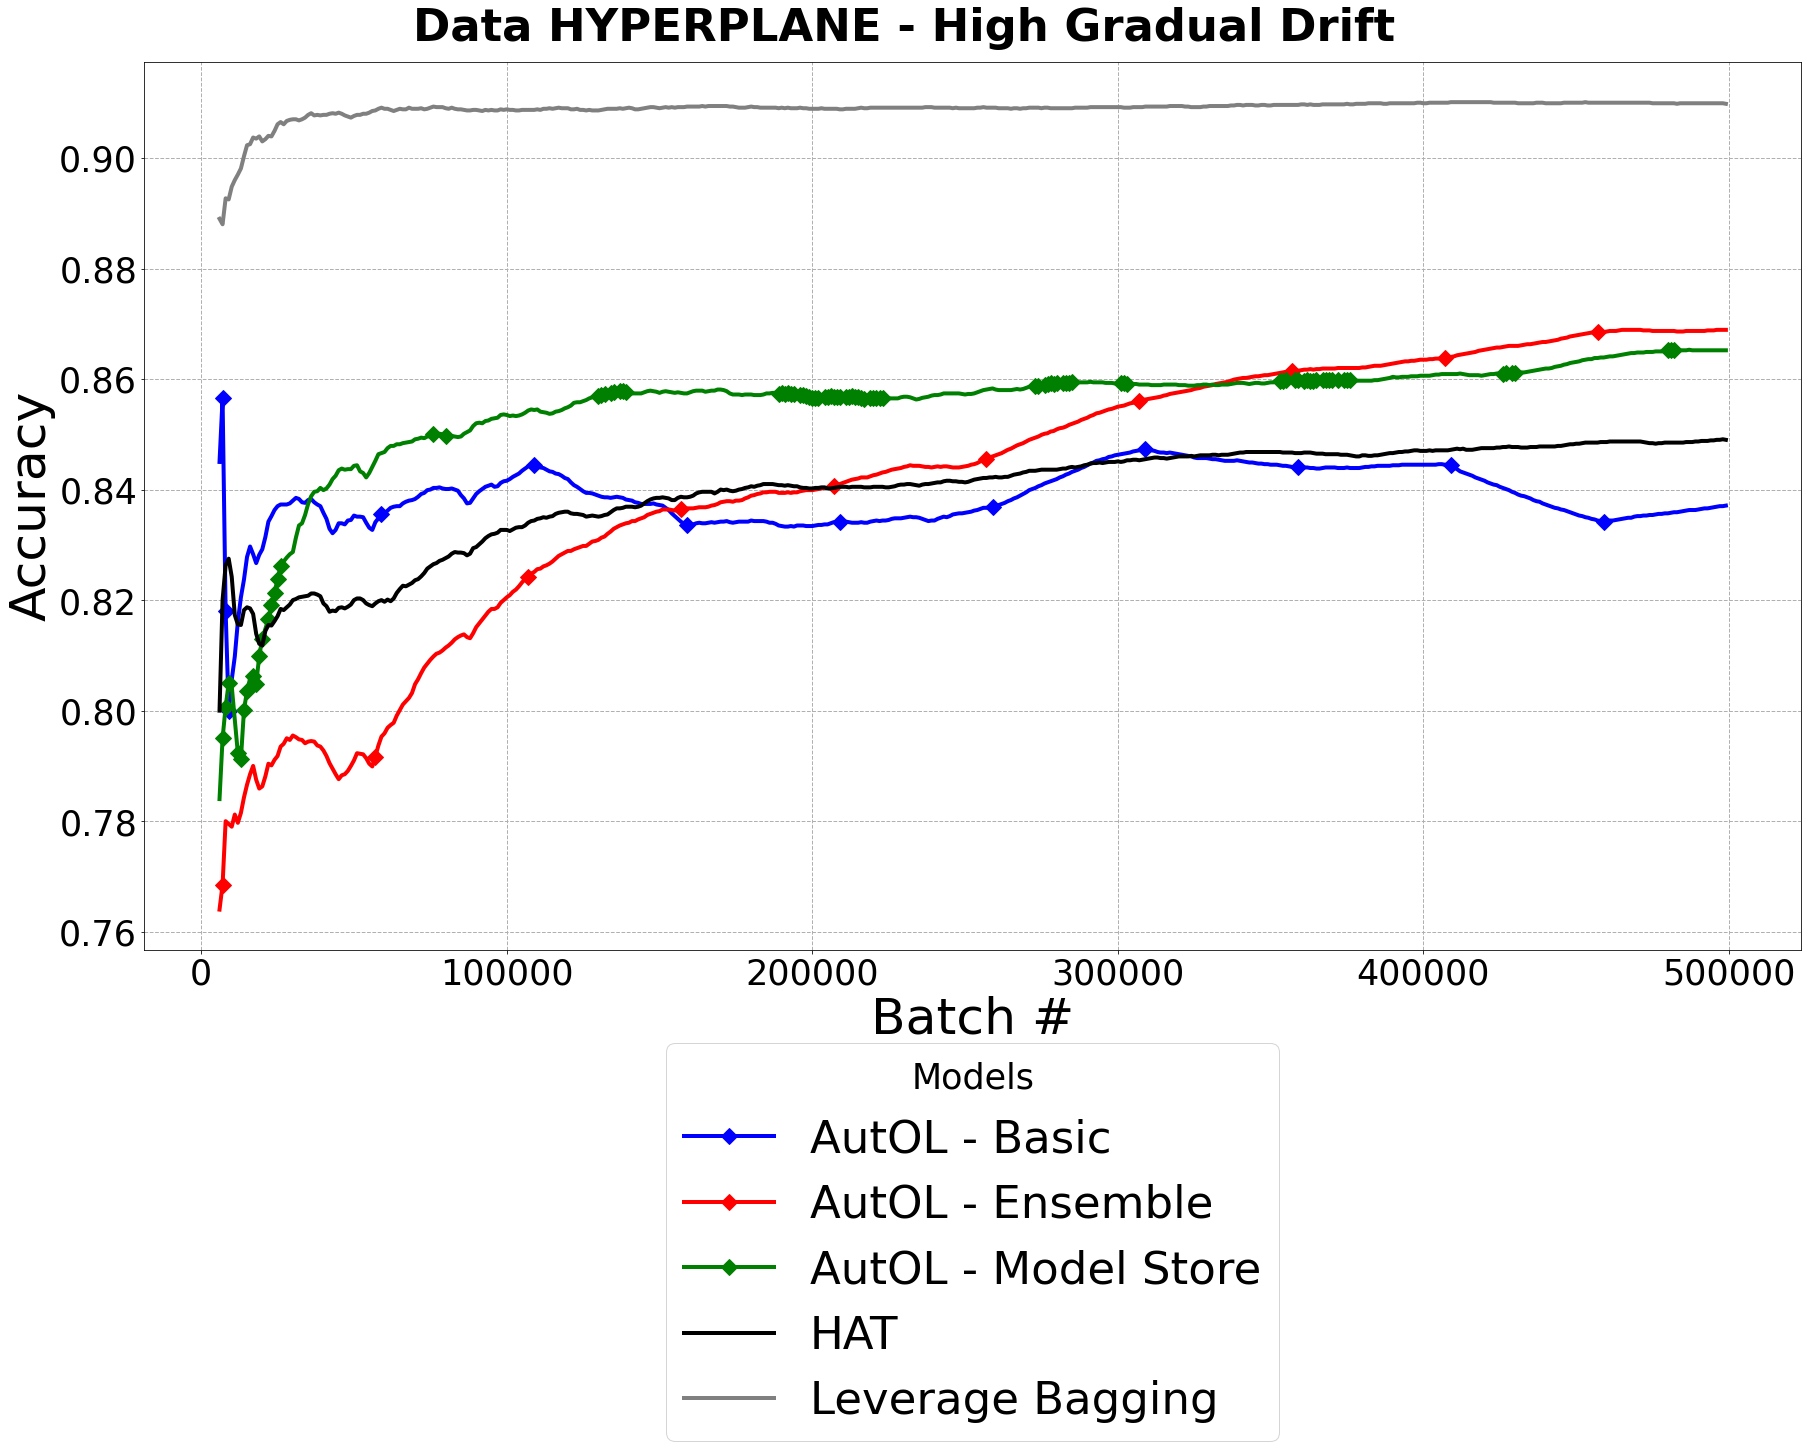

<Figure size 1800x1440 with 0 Axes>

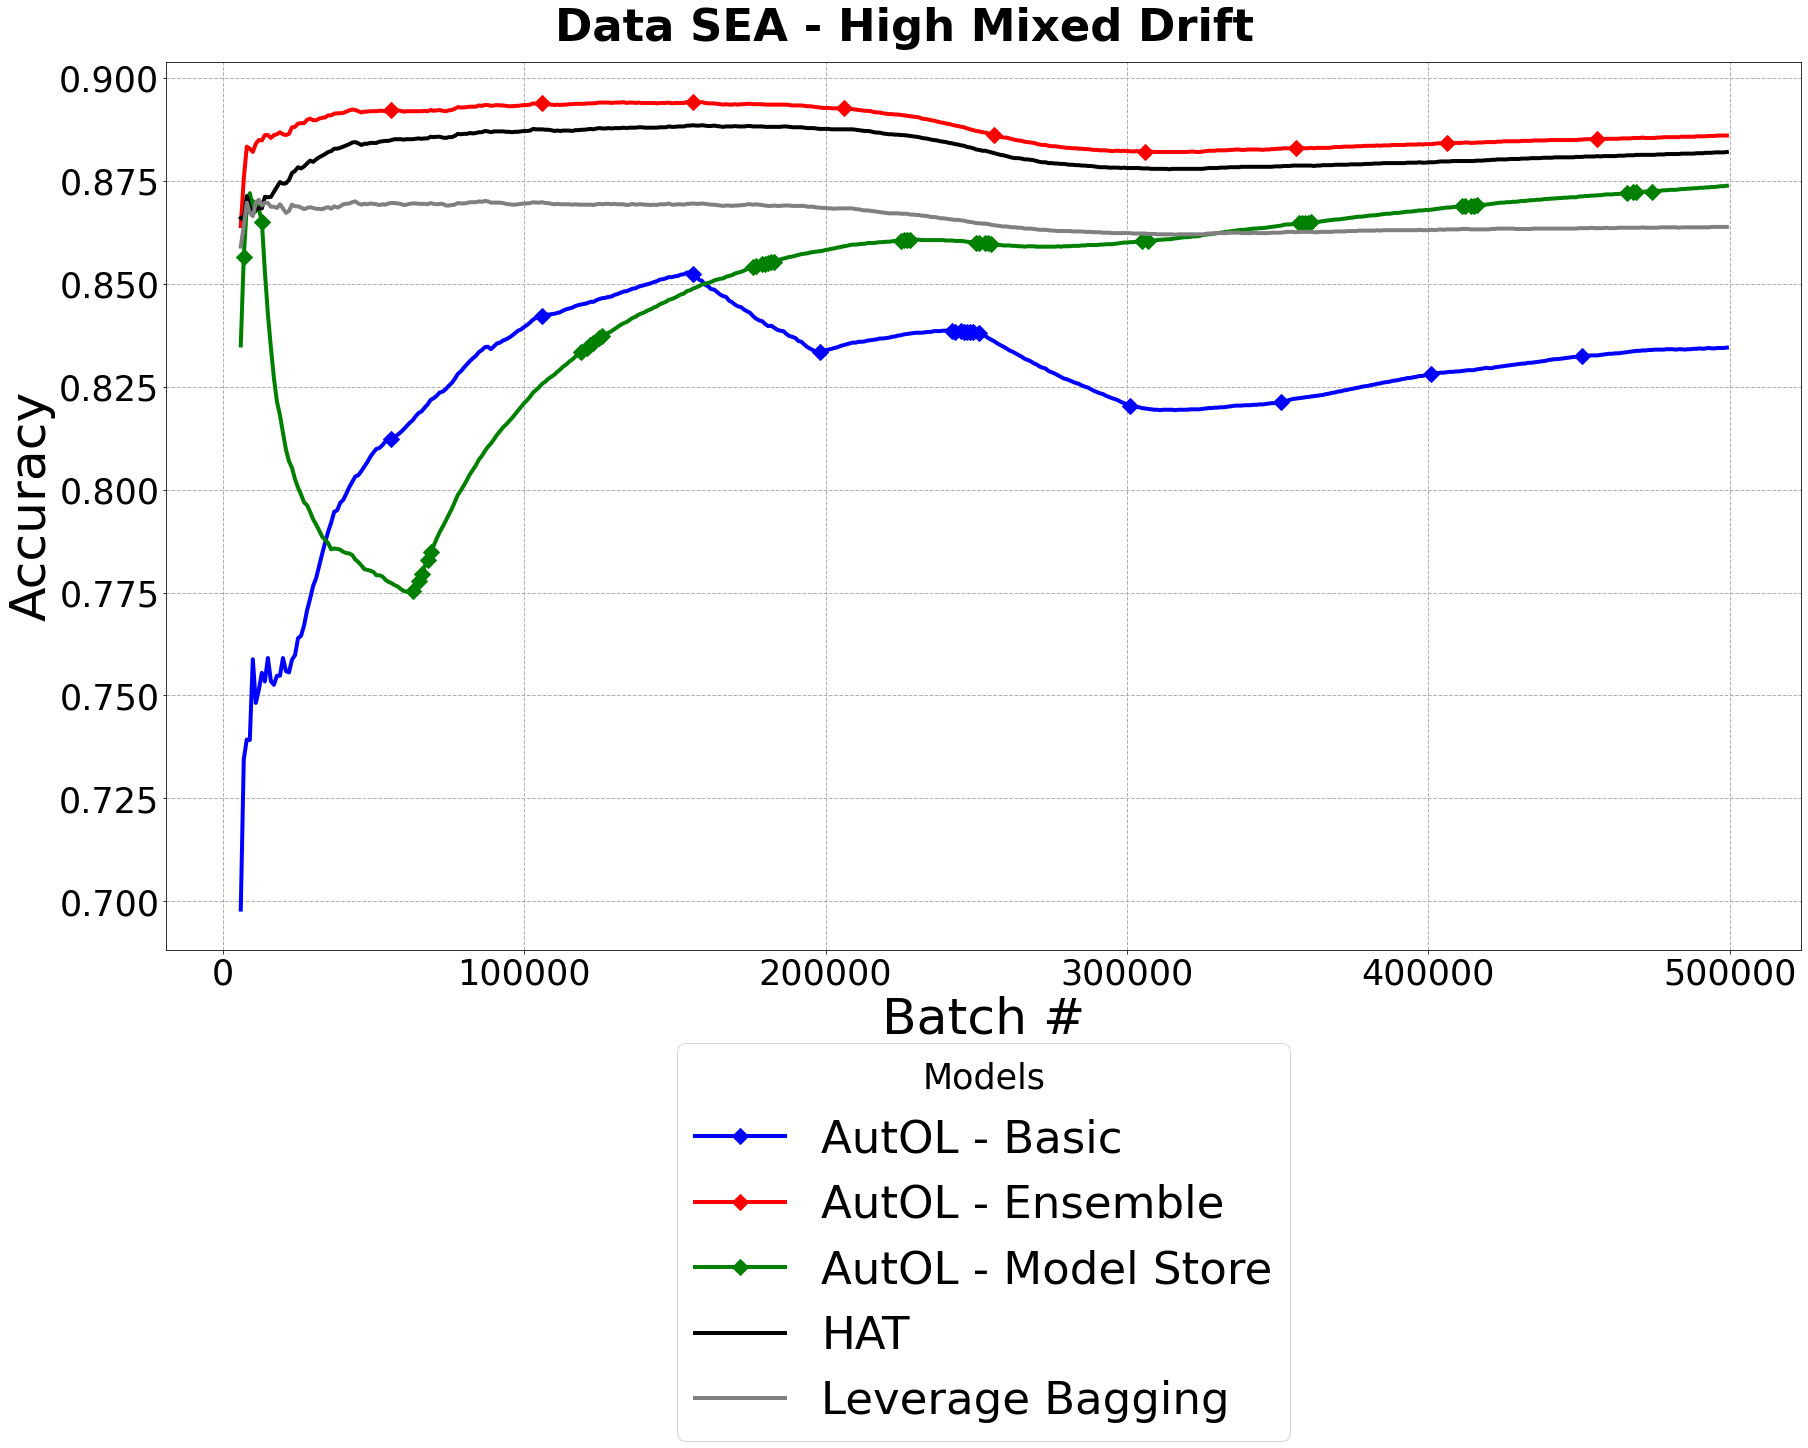

In [6]:
import matplotlib

#Plot-1 Performance
import math
figs = {}

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35

data_names = ["Electricity", "Airlines",  "IMDB", "Vehicle", "SEA - High Abrupt Drift", "HYPERPLANE - High Gradual Drift",
              "SEA - High Mixed Drift"]


def make_marker_array(a,e,choice):
    b= a[choice]
    c = list(b['Batch number'])
    r = []
    for j in c:
        i = math.ceil(j/1000)*1000
        r.append(i)
    both = set(r).intersection(e)
    e=list(e)
    markon = [e.index(x) for x in both]
    return markon
for d in [0,1,3,4, 5, 6]:
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE, titleweight = 'bold')     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE, titleweight = 'bold')  # fontsize of the figure title


    plt.rcParams["figure.figsize"] = (25,20)
    plt.rcParams["axes.labelsize"] = ('x-large')
    figs[d]=plt.figure()
    figs[d], ax = plt.subplots(1, 1, sharex='col', sharey='row', constrained_layout=True)
    figs[d].suptitle('Data '+data_names[int(d)], fontsize=45)
    
    ax.set(xlabel="Batch #", ylabel="Accuracy")
    ax.grid(linestyle='--', linewidth=1)

    #ax.set_title('AutOL Prequential Performance - Data '+data_names[int(d)], fontsize=45)

    ### Marker basic
    a = retrainings['AutOL_Data_'+str(d)]
    e = results["AutOL_Data_" + str(d)]['basic']['Batch number']
    markonb = make_marker_array(a,e,'basic')
    e = results["AutOL_Data_" + str(d)]['ensemble']['Batch number']
    markone = make_marker_array(a,e,'ensemble')
    e = results["AutOL_Data_" + str(d)]['modelstore']['Batch number']
    markonm = make_marker_array(a,e,'modelstore')
#     e = results["AutOL_Data_" + str(d)]['HAT']['Batch number']
#     markonh = make_marker_array(a,e,'HAT')
#     e = results["AutOL_Data_" + str(d)]['LeverageBagging']['Batch number']
#     markonl = make_marker_array(a,e,'LeverageBagging')
    ##############################################################

    #Plot performance lines of each version
    # basic
    l0 = ax.plot(results["AutOL_Data_" + str(d)]['basic']['Batch number'],
                    results["AutOL_Data_" + str(d)]['basic']['Test score'],
                    ms = 12, marker='D', markeredgecolor='b', markevery=markonb,
                    label='AutOL - Basic', lw=4, color='b')
    #ensemble
    l1 = ax.plot(results["AutOL_Data_" + str(d)]['ensemble']['Batch number'],
                    results["AutOL_Data_" + str(d)]['ensemble']['Test score'],
                    ms = 12, marker='D', markeredgecolor='r', markevery=markone,
                    label='AutOL - Ensemble', lw=4, color='r')
    #model store
    l2 = ax.plot(results["AutOL_Data_" + str(d)]['modelstore']['Batch number'],
                    results["AutOL_Data_" + str(d)]['modelstore']['Test score'],
                    ms = 12, marker='D', markeredgecolor='g', markevery=markonm,
                    label='AutOL - Model Store', lw=4, color='g')
    
    #Plot performance lines of baselinse
    #HAT
    l4 = ax.plot(results["AutOL_Data_" + str(d)]['HAT']['Batch number'],
                    results["AutOL_Data_" + str(d)]['HAT']['Test score'],
                    #ms = 12, marker='D', markeredgecolor='black', markevery=markonh,
                    label='HAT', lw=4, color='black')
    #Leverage Bagging
    l5 = ax.plot(results["AutOL_Data_" + str(d)]['LeverageBagging']['Batch number'],
                    results["AutOL_Data_" + str(d)]['LeverageBagging']['Test score'],
                    #ms = 12, marker='D', markeredgecolor='grey', markevery=markonl,
                    label='Leverage Bagging', lw=4, color='grey')


    


    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels,
               loc='upper center',
               bbox_to_anchor=(0.5, -0.1),
               ncol=1,
               borderaxespad=0.1,
               title="Models",
               prop={'size': 45})

    #plt.yticks(np.arange(results["AutOL_Ensemble_Data_" + str(d)]['Test score'], results["AutOL_Ensemble_Data_" + str(d)]['Test score']+0.1, 0.1))

    plt.plot()
    figs[d].show()
    figs[d].savefig(link_to_files+"/Performance_Data"+str(d)+".png")
    

In [28]:
a = retrainings['AutOL_Data_'+str(6)]
e = results["AutOL_Data_" + str(d)]['modelstore']['Batch number']
b= a['modelstore']
c = list(b['Batch number'])
r = []
for j in c:
    i = math.ceil(j/1000)*1000
    r.append(i)
both = set(r).intersection(e)
e=list(e)
[e.index(x) for x in both]


[170,
 410,
 405,
 63,
 175,
 351,
 463,
 4,
 116,
 244,
 468,
 57,
 249,
 409,
 62,
 174,
 222,
 462,
 115,
 355,
 120,
 248,
 408,
 173,
 221,
 301,
 354,
 7,
 119,
 247,
 60,
 220,
 460,
 1,
 113,
 177,
 353,
 406,
 59,
 171,
 219,
 299,
 176,
 352,
 117,
 245]